In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

# Investigate $\Phi$ as a function of $q$
$q$ has to be < 1 to guarentee $\Phi > 0$

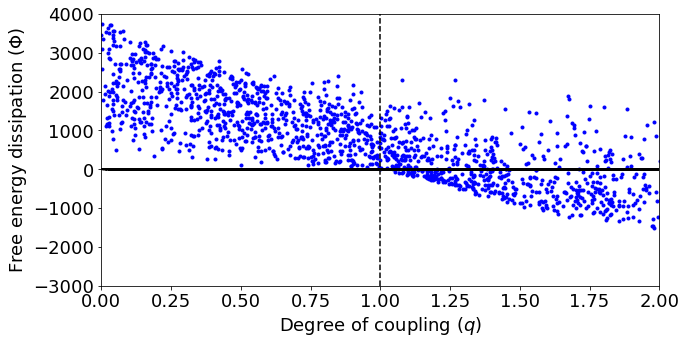

In [2]:
# assume dG
dG_c = -40
dG_a = 20

l_aa = []; l_cc = []; l_ac = [];
q = []; J_a = []; J_c = []; phi = [];
Z = [];

# perform random sampling and calculate q, J and phi
for i in range(2000):
    l_aa.append(2*scipy.rand()) # [0,2]
    l_cc.append(2*scipy.rand()) # [0,2]
    l_ac.append(2*scipy.rand()) # [0,2]

    q.append(l_ac[i] / np.sqrt(l_cc[i]*l_aa[i]))
    
    J_a.append(- l_aa[i] * dG_a - l_ac[i] * dG_c)
    J_c.append(- l_cc[i] * dG_c - l_ac[i] * dG_a)

    phi.append(- J_a[i] * dG_a - J_c[i] * dG_c)
    
    Z.append(np.sqrt(l_aa[i]/l_cc[i]))

# phi vs q
f = plt.figure(figsize=[10, 5])
plt.plot(q, phi, color='b', marker='.',linestyle='none')
plt.plot([1]*100, np.linspace(-3000, 4000, 100),'k--')
plt.plot(q,[0]*len(q),'k--')
plt.xlabel(r'Degree of coupling ($q$)'); plt.ylabel(r'Free energy dissipation ($\Phi$)')
plt.xlim([0, 2])
plt.ylim([-3000,4000])
plt.show()

f.savefig('../Figures/Phi_vs_q.pdf', dpi=300, bbox_inches="tight")

# J vs Z and dG when q ~ 1

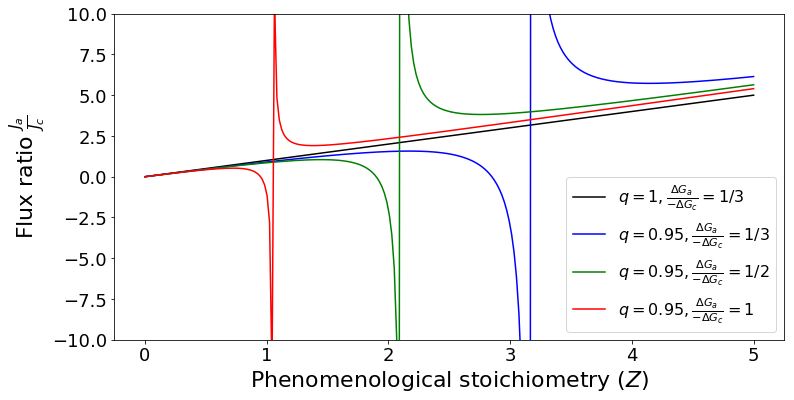

In [16]:
dG_c = []; dG_a = []
l_aa = []; l_cc = []; l_ac = [];
q = []; J_a = []; J_c = []; phi = [];
Z = [];

f = plt.figure(figsize=[12, 6])

Z = np.linspace(0, 5, num=250)
r = 1/3; q = 1
plt.plot(Z, (q*Z - Z**2 * r) / (1 - q*Z*r), color='k',linestyle='-')

r = 1/3; q = 0.95
plt.plot(Z, (q*Z - Z**2 * r) / (1 - q*Z*r), color='b',linestyle='-')

r = 1/2; q = 0.95
plt.plot(Z, (q*Z - Z**2 * r) / (1 - q*Z*r), color='g',linestyle='-')

r = 1; q = 0.95
plt.plot(Z, (q*Z - Z**2 * r) / (1 - q*Z*r), color='r',linestyle='-')

plt.ylim([-10,10])
plt.xlabel(r'Phenomenological stoichiometry ($Z$)',fontsize=22); plt.ylabel(r'Flux ratio $\frac{J_a}{J_c}$', fontsize=22)
plt.legend([r'$q=1, \frac{\Delta G_a}{-\Delta G_c}=1/3$', r'$q=0.95, \frac{\Delta G_a}{-\Delta G_c}=1/3$',  r'$q=0.95, \frac{\Delta G_a}{-\Delta G_c}=1/2$', r'$q=0.95, \frac{\Delta G_a}{-\Delta G_c} = 1$'])
plt.show()

f.savefig('../Figures/J_vs_Z.pdf', dpi=300, bbox_inches="tight")

# Randomly initialize parameter sets
Guarentee that q < 1 to ensure anabolic flux is positive

In [4]:
q = 2 # init
while q > 1: # ensure 0 < q < 1
    l_aa = 2*scipy.rand() # [0,2]
    l_cc = 2*scipy.rand() # [0,2]
    l_ac = 2*scipy.rand() # [0,2]

    q = l_ac / np.sqrt(l_cc*l_aa)
    Z = np.sqrt(l_aa/l_cc)

dG_a = 20*scipy.rand() # [0,20]
dG_c = -1*(10+30*scipy.rand()) # [-40,-10]

print(l_aa, l_cc, l_ac)
print(q,Z)
print(dG_a, dG_c)

1.8839996902795042 0.16401449030533377 0.3766211667639956
0.6775216875808234 3.3892164387026824
10.438841053485596 -10.616832948958209


# Anabolic and catabolic fluxes
anabolism is decreasing linearly with the back pressure exerted by its own free energy.  
Catabolism should be subject to a similar reduction at high free energy of anabolism. 

Static head should be at: 0.6


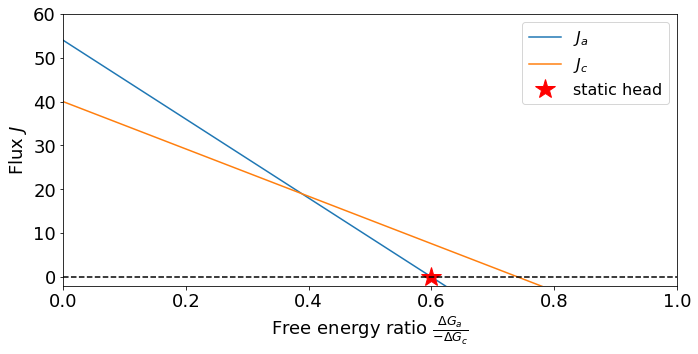

In [5]:
dG_c = -40
dG_a = 20

l_cc = 1

q = 0.9
Z = 1.5

dG_a = np.linspace(0,-1*dG_c,100)

J_a = (l_cc*-1*dG_c) * (q*Z - Z**2*(dG_a/(-1*dG_c)) )
J_c = (l_cc*-1*dG_c) * (1 - q*Z*(dG_a/(-1*dG_c)) )

static_head = q/Z
print('Static head should be at:', static_head)

f = plt.figure(figsize=[11,5])
ax = plt.subplot(1,1,1)
ax.plot(dG_a/(-1*dG_c), J_a, label = r'$J_a$')
ax.plot(dG_a/(-1*dG_c), J_c, label = r'$J_c$')
ax.plot(static_head, (l_cc*-1*dG_c) * (q*Z - Z**2*static_head ), '*r', ms=20, label = 'static head',)
ax.plot(dG_a/(-1*dG_c), np.zeros((len(dG_a/(-1*dG_c)),1)), '--k')
ax.legend()
ax.set_xlabel(r'Free energy ratio $\frac{\Delta G_a}{-\Delta G_c}$')
ax.set_ylabel(r'Flux $J$')
plt.ylim([-2,60])
plt.xlim([0,1])

plt.show()

f.savefig('../Figures/J_vs_free_energy_ratio.pdf', dpi=300, bbox_inches="tight")

# Yield and Efficiency
at low free energy of anabolism the yield should decrease almost linearly with increasing free energy of anabolism. Because the denominator in this equation then goes to zero, at higher such free energies of anabolism, this decrease should become progressively stronger.

thermodynamic efficiency, equal to the product of the yield with the ratio of free energy differences, thereby exhibits an optimum in its variation with the free energy of anabolism.

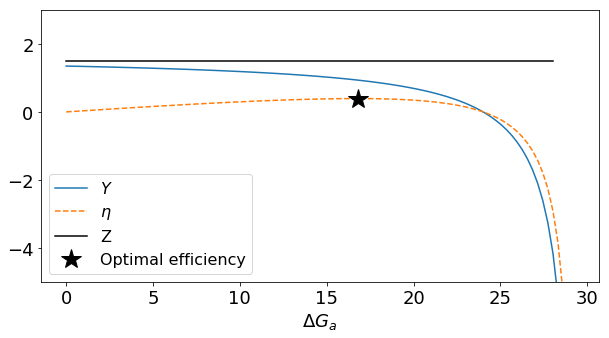

In [6]:
dG_c = -40
l_cc = 1

q = 0.9
Z = 1.5

dG_a = np.linspace(0,-0.73*dG_c,100)

J_a = (l_cc*-1*dG_c) * (q*Z - Z**2*(dG_a/(-1*dG_c)) )
J_c = (l_cc*-1*dG_c) * (1 - q*Z*(dG_a/(-1*dG_c)) )

Y = J_a / J_c
eta = Y * (dG_a/(-1*dG_c))

f = plt.figure(figsize=[10,5])
ax = plt.subplot(1,1,1)
ax.plot(dG_a, Y, '-', label = r'$Y$')
ax.plot(dG_a, eta, '--', label = r'$\eta$')
ax.plot(np.linspace(0, 28, num=100), np.array([Z]*100).transpose(),color='k',label='Z')
ax.plot(dG_a[np.argmax(eta)], eta[np.argmax(eta)],'*k', ms=20, label='Optimal efficiency')
# ax.plot(dG_a, np.repeat([-b/-a],len(dG_a)), label = 'hor. asymptote')
# ax.plot(np.repeat([1/((Z*q)/(-dG_c))],100), np.linspace(min(eta),max(Y),100), label = 'vert. asymptote')

plt.ylim([-5,3])

ax.set_xlabel(r'$\Delta G_a$')

ax.legend()
plt.show()

f.savefig('../Figures/yield_vs_dGa.pdf', dpi=300, bbox_inches="tight")

In [7]:
# eta = (a*x - b*x^2) / (1 - a*x)
# a = (Z*q) / (-dG_c), b = (Z**2) / (dG_c**2)
a = (Z*q)/(-1*dG_c)
b = (Z**2)/(dG_c**2)
print('highest coefficients in numerator and denominator:',a,b)

# vertical asymptote of eta (when denominator equals zero)
print('Vertical asymptote:', 1/a )

# horizontal asymptote (if powers are equal, i.e. when b << a, will never be fully true)
print('Horizontal asymptote:',-b / -a)

highest coefficients in numerator and denominator: 0.03375 0.00140625
Vertical asymptote: 29.629629629629626
Horizontal asymptote: 0.041666666666666664


# Increasing coupling
Anabolic flux, yield and efficiency should all increase with tighter coupling.

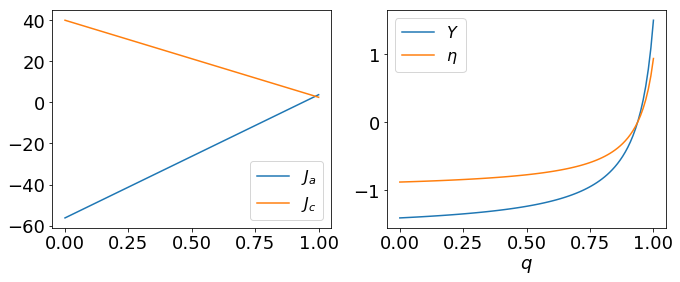

In [10]:
dG_c = -40
dG_a = 25 # keep dG_a fixed
L_cc = 1
Z = 1.5
q = np.linspace(0,1,100) # vary q

J_a = (l_cc*-1*dG_c) * (q*Z - Z**2 * (dG_a/(-1*dG_c)))
J_c = (l_cc*-1*dG_c) * (1 - q*Z*(dG_a/(-1*dG_c)))
Y = J_a / J_c
eta = Y * (dG_a/(-1*dG_c))

fig = plt.figure(figsize=(11,4))
ax = plt.subplot(1,2,1)
ax.plot(q, J_a, label = r'$J_a$')
ax.plot(q, J_c, label = r'$J_c$')
ax.legend()
ax = plt.subplot(1,2,2)
ax.plot(q, Y, label = r'$Y$')
ax.plot(q, eta, label = r'$\eta$')
ax.legend()

ax.set_xlabel(r'$q$')

plt.show()